In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
temp_df     =pd.read_csv("Resources/CA avg temps 2000-2020.csv")
precip_df   =pd.read_csv("Resources/CA total precip 2000-2020.csv")
beefprod_df = pd.read_csv( "Resources/beef production 2000-2020.csv")
data = pd.read_csv("Resources/CA avg temps and beef 2000-2020.csv")

In [4]:
#clean beef dataframe


beefprod_df["beef production in LB"]=beefprod_df["beef production in LB"].str.replace(",","").astype(float)/1000000000
beefprod_df["beef production in LB"]=round(beefprod_df["beef production in LB"],2)
beefprod_df["Year"]=beefprod_df["Year"].astype(str)
beefprod_df=beefprod_df.rename(columns={"beef production in LB":"beef prod in billion LB"})



In [5]:
beefprod_df

,Year,beef prod in billion LB
0,2000,1.92
1,2001,1.99
2,2002,1.83
3,2003,1.99
4,2004,1.98
5,2005,1.93
6,2006,1.99
7,2007,1.98
8,2008,2.00
9,2009,1.90


Text(0, 0.5, 'Beef production in LB')

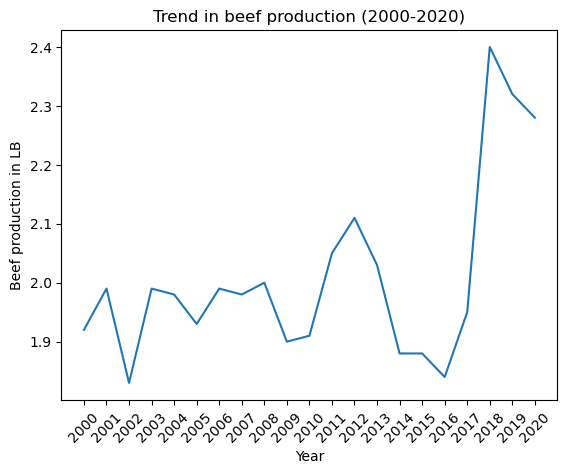

In [6]:
#trend in beef production 
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod in billion LB"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Trend in beef production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production in LB")

rvalue:-0.12


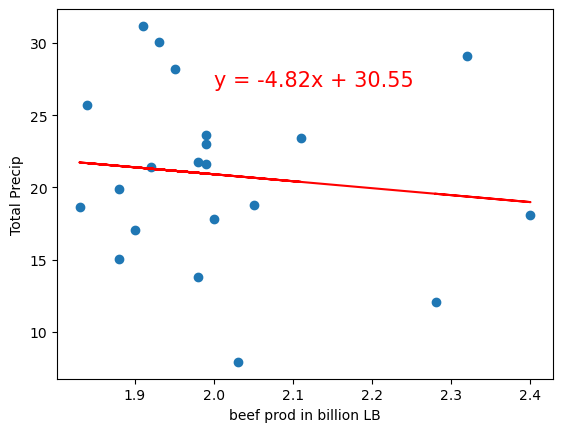

In [7]:
#Scatter plot

x_values =beefprod_df["beef prod in billion LB"]
y_values = precip_df ["Total Precip"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,27),fontsize=15,color="red")
plt.xlabel("beef prod in billion LB")
plt.ylabel("Total Precip")
print(f"rvalue:{round(rvalue,2)}")
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             21 non-null     int64  
 1   Avg_Temp         21 non-null     float64
 2   Beef_production  21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 632.0 bytes


In [9]:
data["Year"] = pd.to_datetime(data["Year"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             21 non-null     datetime64[ns]
 1   Avg_Temp         21 non-null     float64       
 2   Beef_production  21 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 632.0 bytes


In [11]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,21,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002,1970-01-01 00:00:00.000002005,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002015,1970-01-01 00:00:00.000002020,NaN
Avg_Temp,21.0,59.261905,57.4,58.8,58.9,60.1,61.5,0.999238
Beef_production,21.0,25612.942857,23394.9,25384.8,25854.3,26199.8,26821.4,956.308358


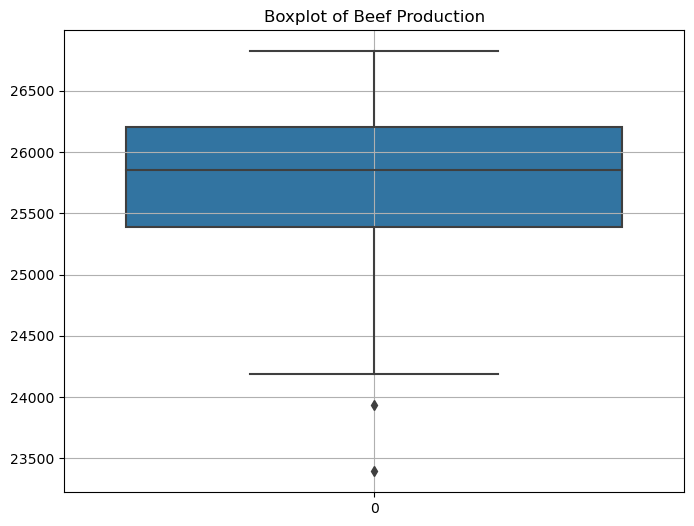

In [12]:
# Plotting a box plot to identify outliers
plt.figure(figsize=(8,6))
sns.boxplot(data["Beef_production"])
plt.title("Boxplot of Beef Production")
plt.grid()
plt.show()

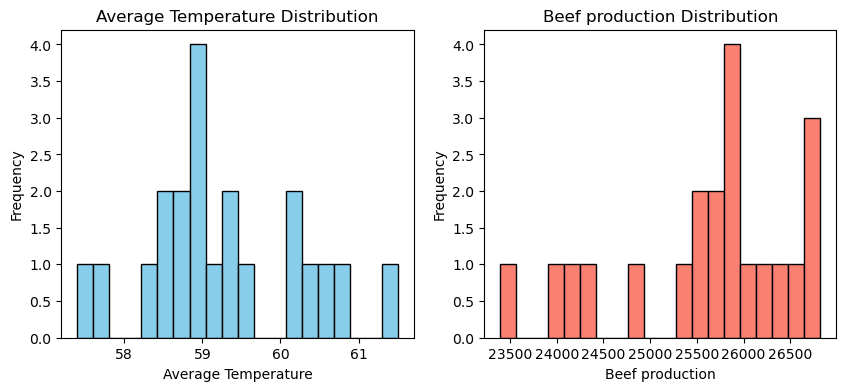

In [13]:
plt.figure(figsize=(10,4))

#Ploting histogram for Average Temperature
plt.subplot(1,2,1)
plt.hist(data["Avg_Temp"], bins=20, color="skyblue", edgecolor='black')
plt.title("Average Temperature Distribution")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(data["Beef_production"], bins=20, color="salmon", edgecolor='black')
plt.title("Beef production Distribution")
plt.xlabel("Beef production")
plt.ylabel("Frequency")

plt.show()

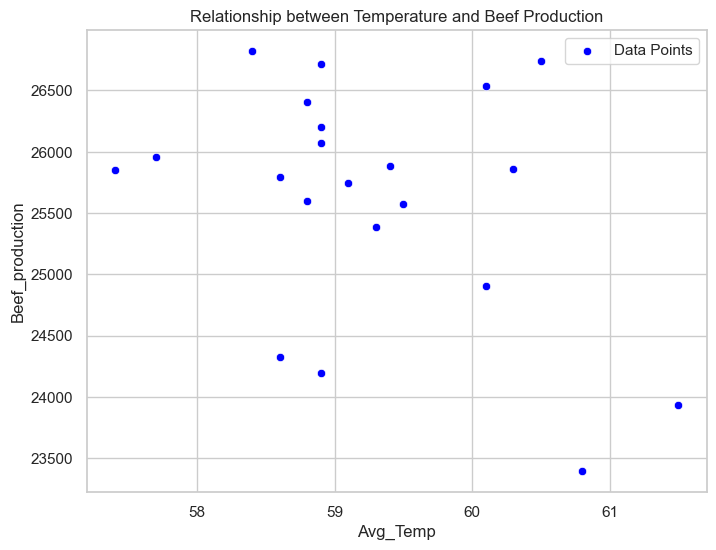

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Temp", y = "Beef_production", data=data, color="Blue", label='Data Points')
plt.title('Relationship between Temperature and Beef Production')
plt.legend()

plt.show()


In [16]:
model = LinearRegression()
model.fit(data[['Avg_Temp']], data['Beef_production'])
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(data[['Avg_Temp']], data['Beef_production'])

print(f"R squared value for the regression: {r_squared}")
print(f"Slope of the regression line: {slope}")
print(f"Intercept of the regression line: {intercept}")

R squared value for the regression: 0.14430186455533456
Slope of the regression line: -363.55076783670387
Intercept of the regression line: 47157.65383679895
